.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

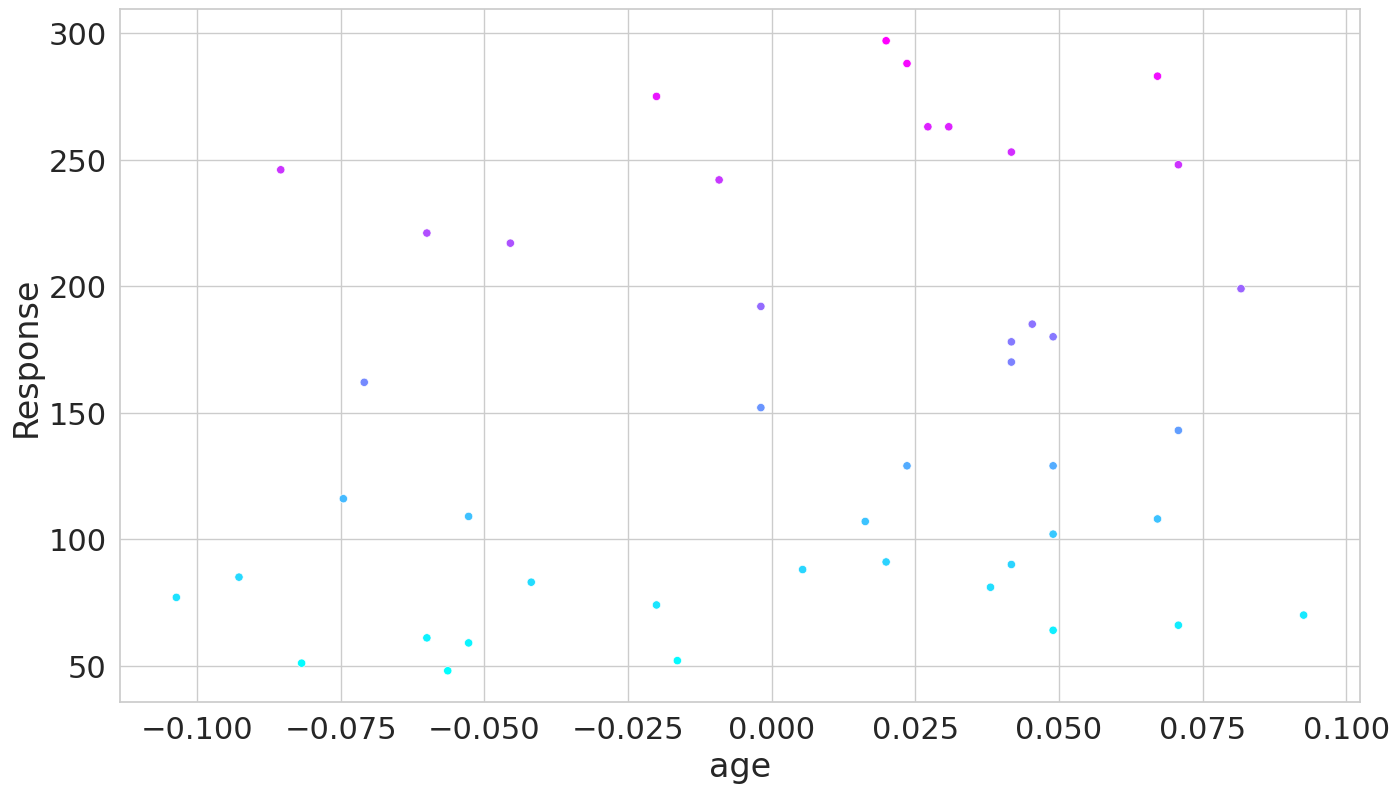

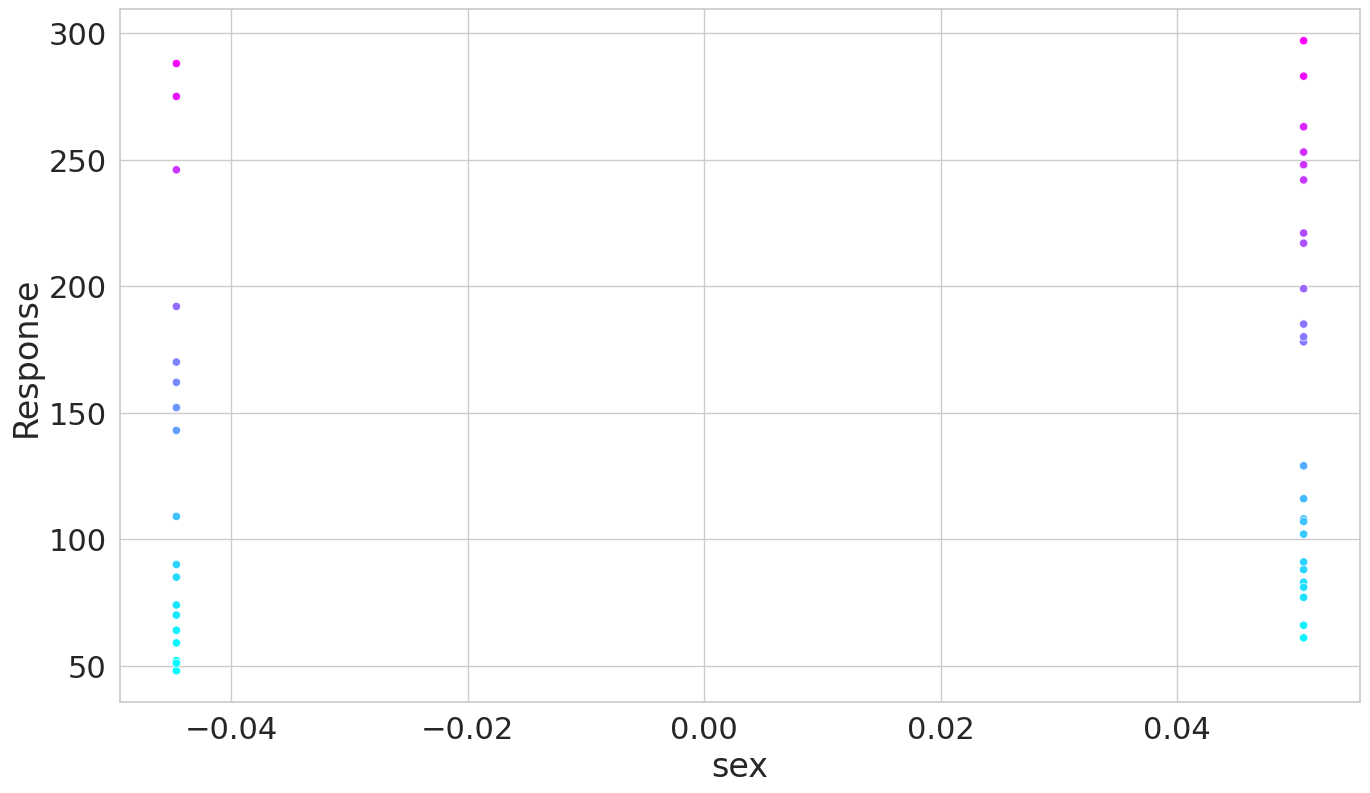

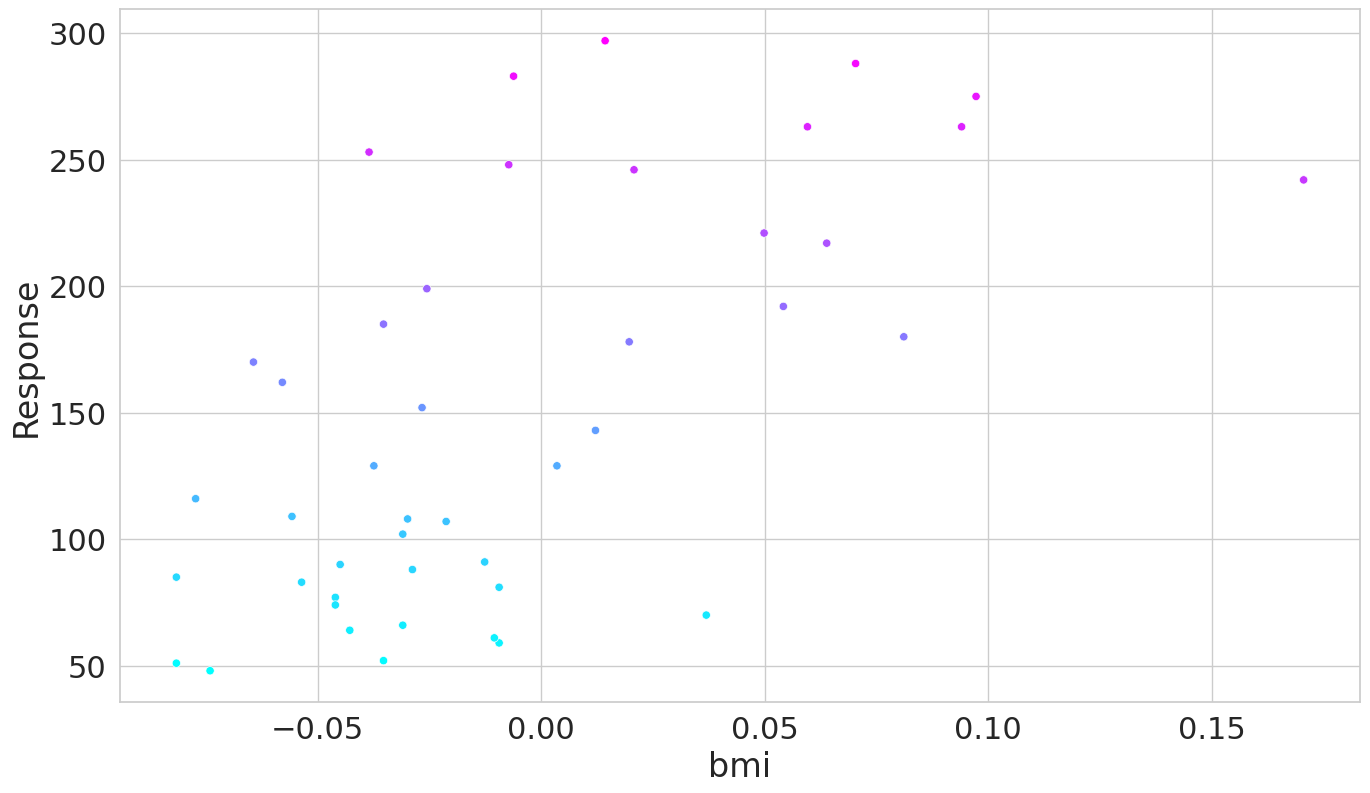

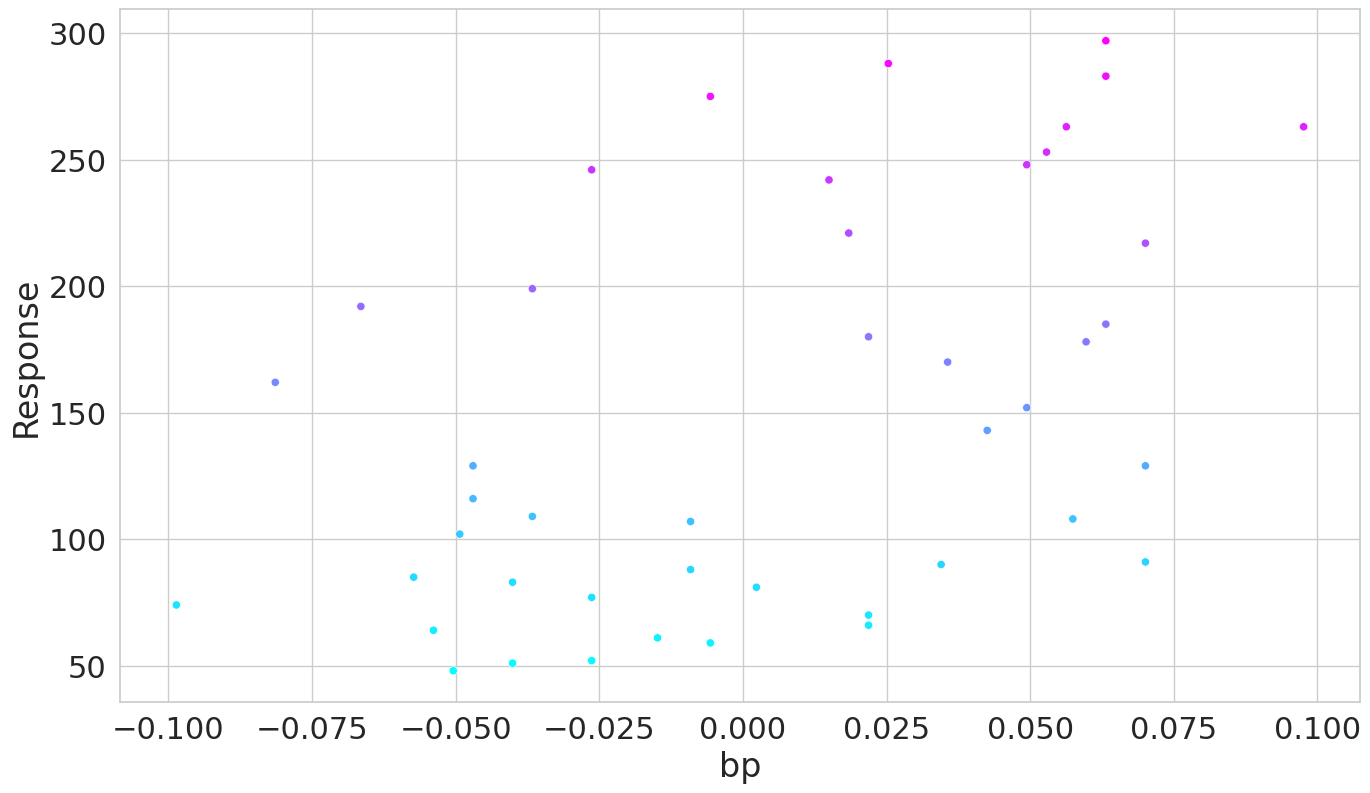

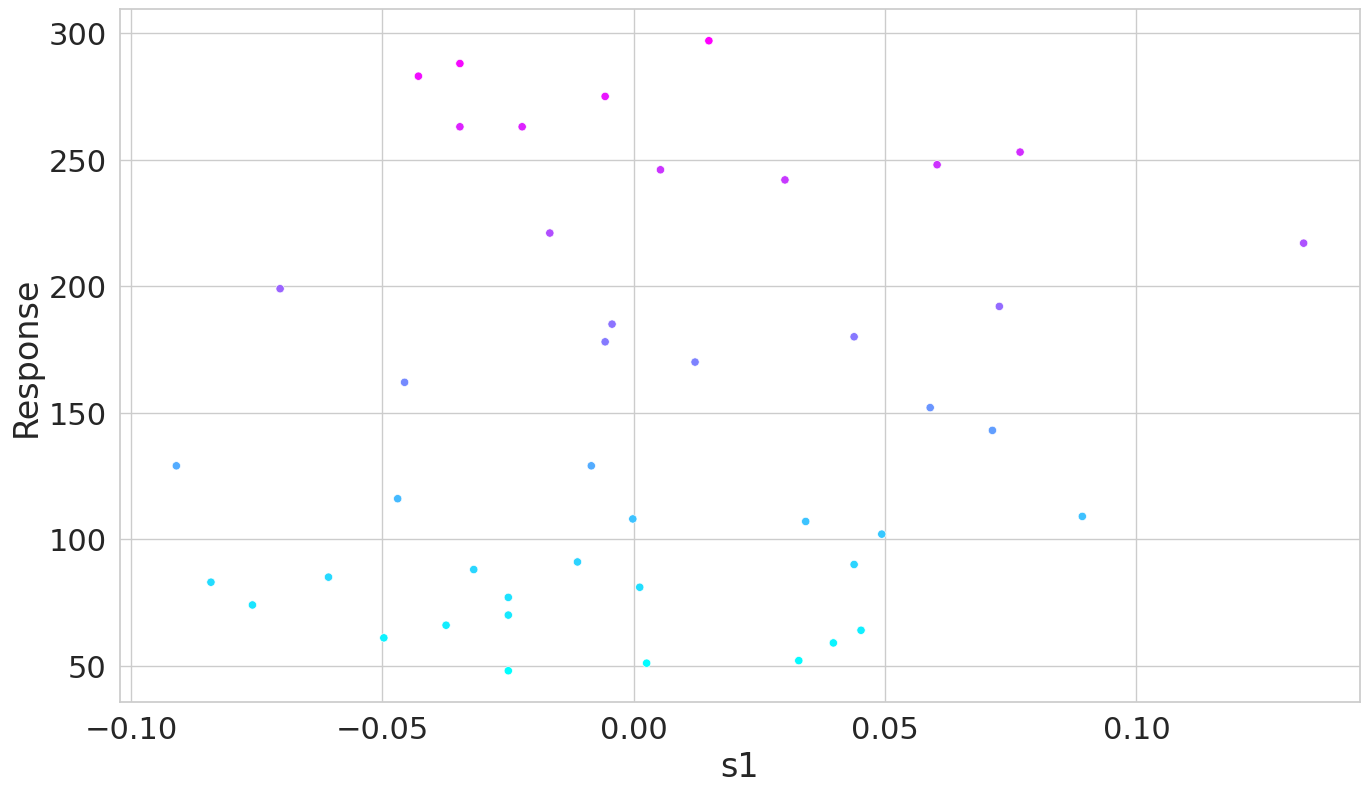

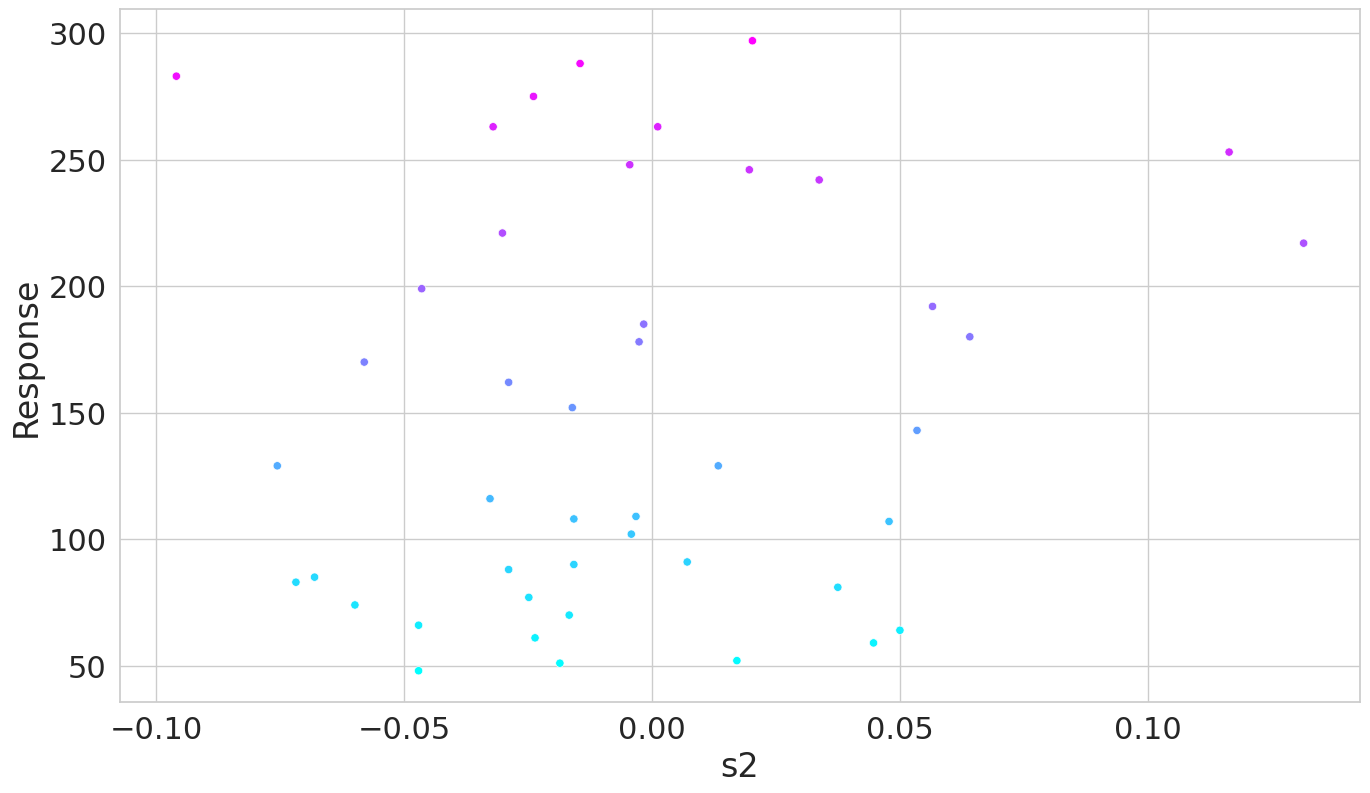

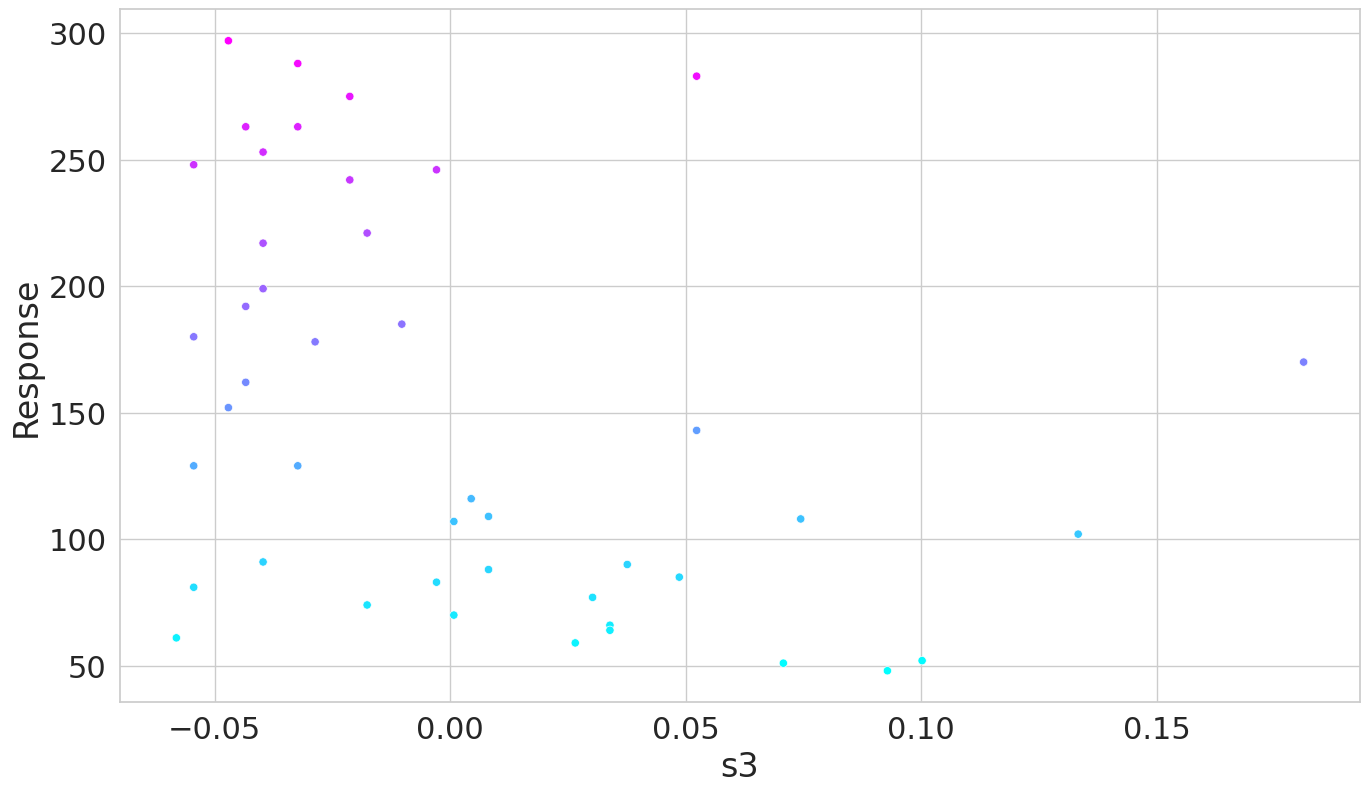

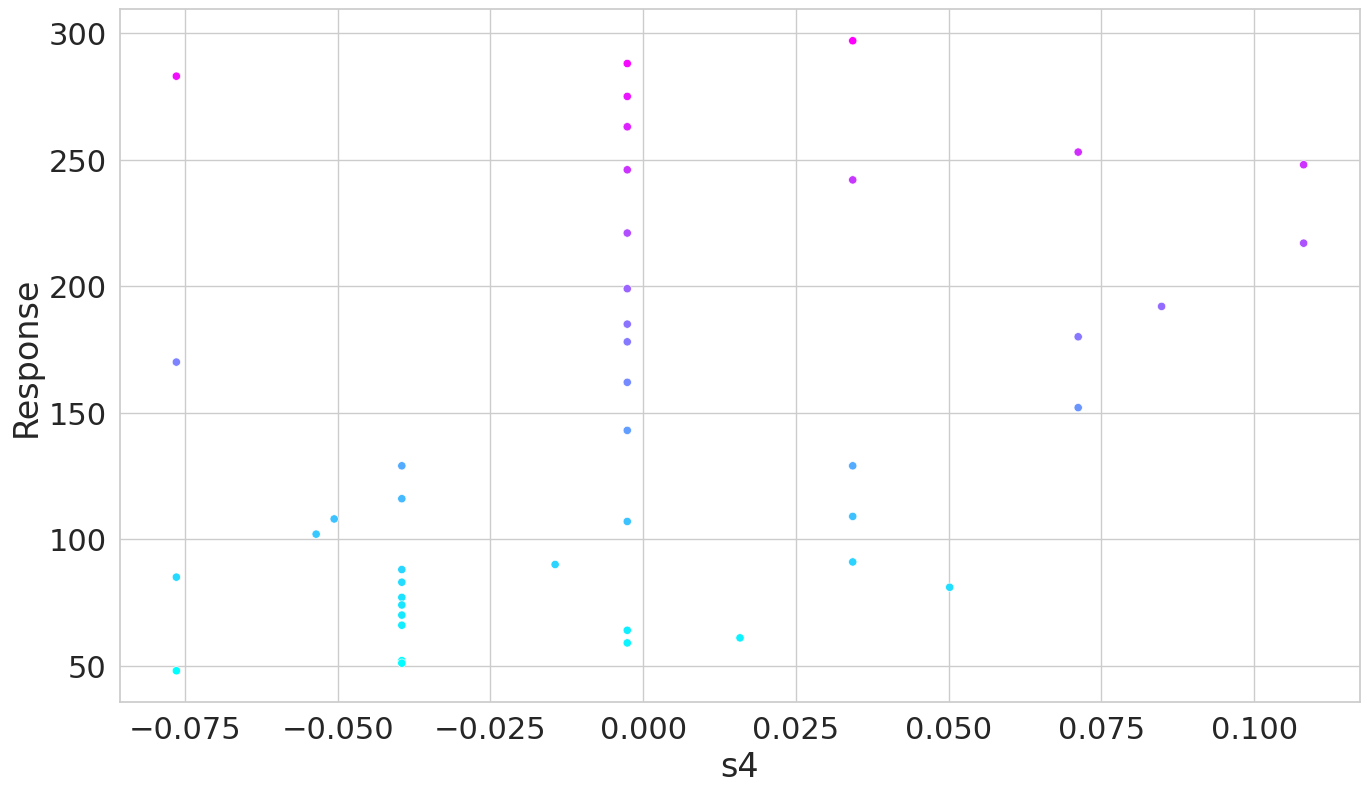

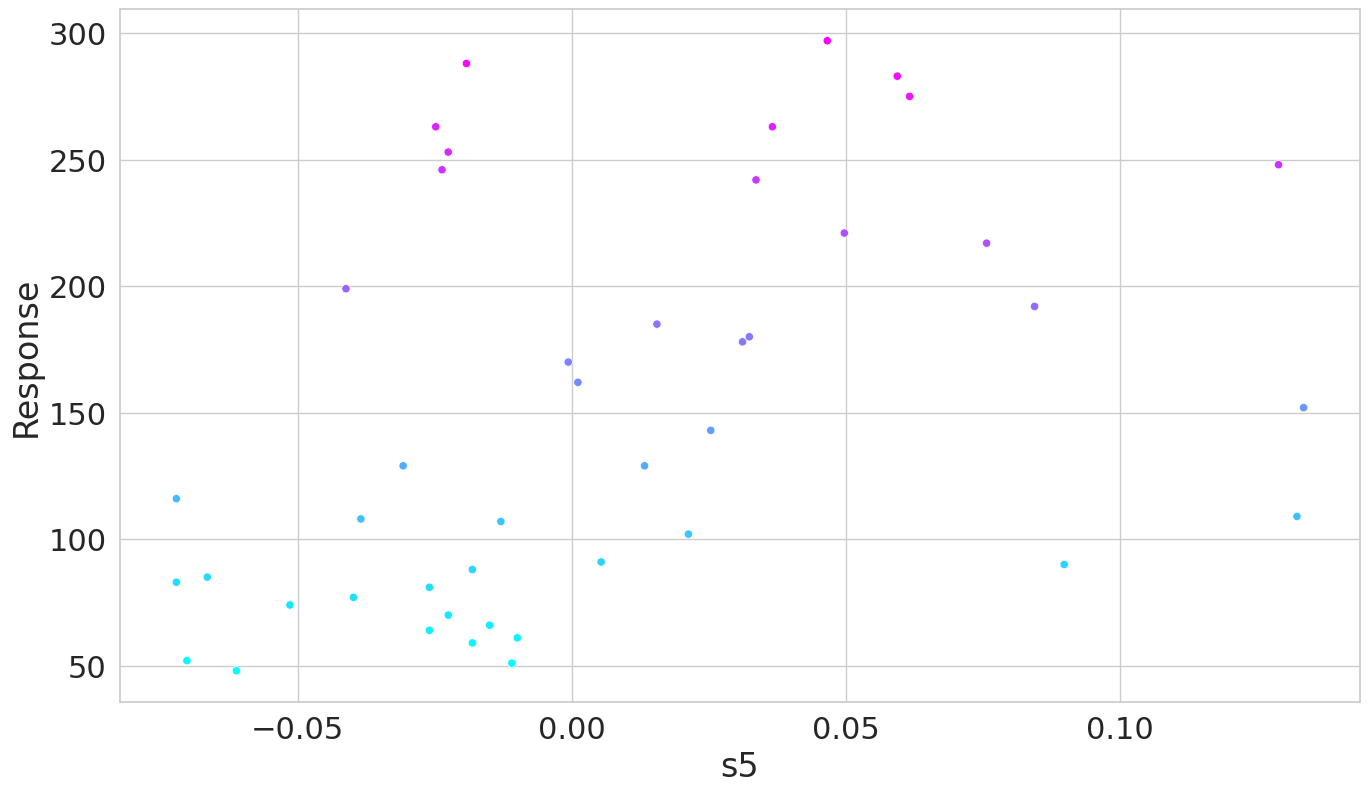

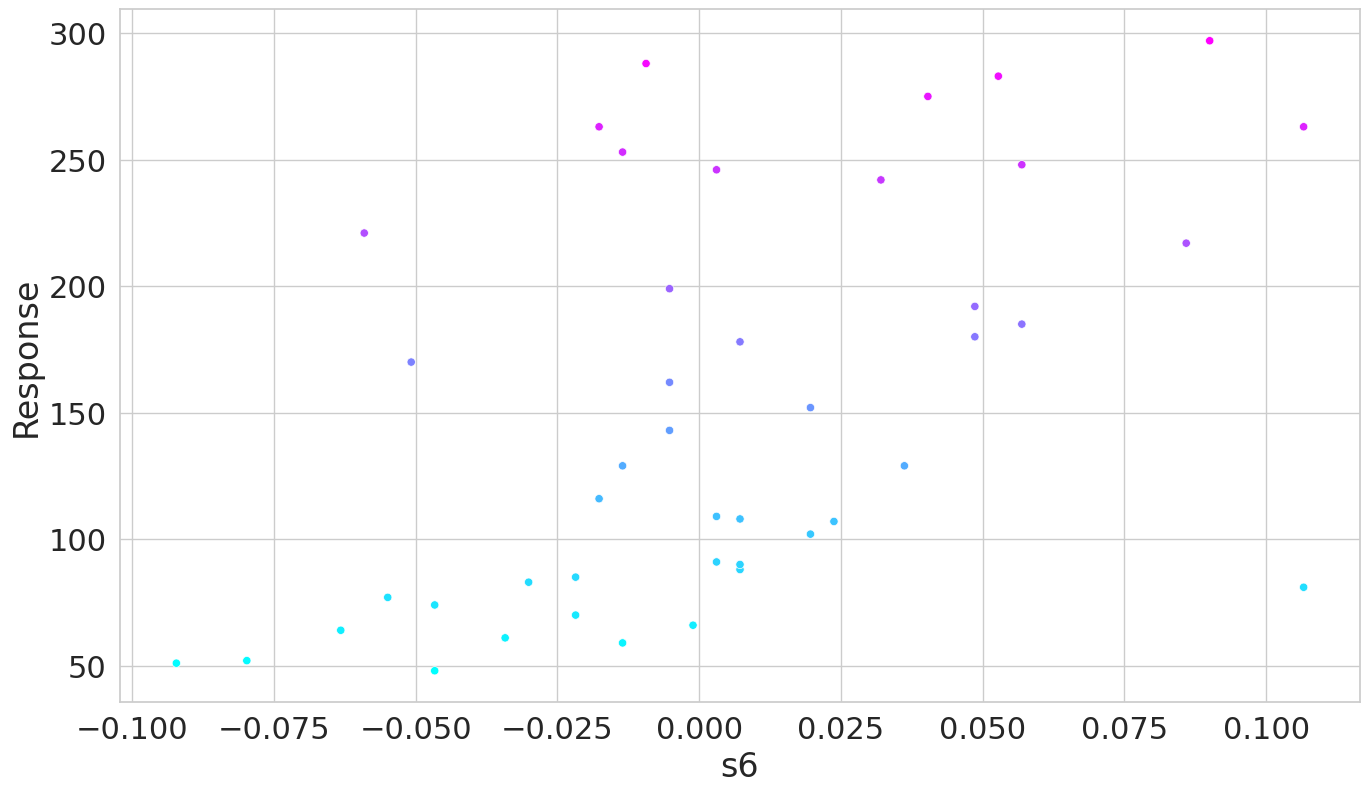

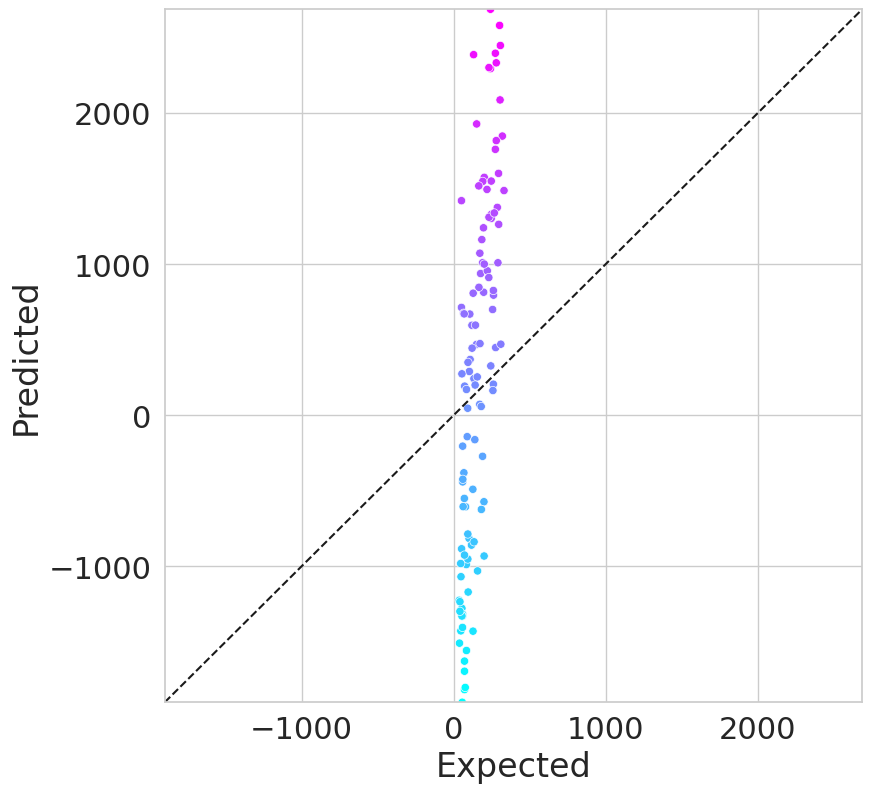

In [44]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
diabetes = load_diabetes()
print(diabetes.DESCR)
#step 1 load the dataset
# Access the shape attribute without parentheses
data_shape = diabetes.data.shape
target_shape = diabetes.target.shape
feature_names = diabetes.feature_names
# Print the shapes
print("Data Shape:", data_shape)
print("Target Shape:", target_shape)
print("Feature_names", feature_names)


# Set Pandas options individually
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 11)
pd.set_option('display.width', None)
# step 2 explore the data with pandas

diabetes_df = pd.DataFrame(diabetes.data,
              columns=diabetes.feature_names)
diabetes_df['Response'] = pd.Series(diabetes.target)

print(diabetes_df.head())
print(diabetes_df.describe())

# step 3  visualize the features

sample_df = diabetes_df.sample(frac=0.1, random_state=17)
sns.set(font_scale=2)
sns.set_style('whitegrid')


for feature in diabetes.feature_names:
  plt.figure(figsize=(16, 9))
  sns.scatterplot(data=sample_df, x=feature,
  y='Response', hue='Response',
  palette='cool', legend=False)
# step 4  spliting the data for training,testing

X_train, X_test, y_train, y_test = train_test_split(
   diabetes.data, diabetes.target, random_state=11)

print(X_train.shape)
print(X_test.shape)

#step 5 traing the model


# Normalize (standardize) the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)


for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {model.coef_[i]}')

print(f'Intercept: {model.intercept_}')


# step 6 Testing the Model

predicted = linear_regression.predict(X_test)
expected = y_test
print(predicted[:5])
print(expected[:5])
# step 7 Visualizing the Expected vs. Predicted values
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
     hue='Predicted', palette='cool', legend=False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')

# step 8 Regression Model Metrics
from sklearn import metrics
print(metrics.r2_score(expected, predicted))

print(metrics.mean_squared_error(expected, predicted))

# step 9 Choosing the Best Model
from sklearn.linear_model import ElasticNet, Lasso, Ridge
estimators = {
  'LinearRegression': linear_regression,
  'ElasticNet': ElasticNet(),
  'Lasso': Lasso(),
  'Ridge': Ridge()
  }
from sklearn.model_selection import KFold, cross_val_score
for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object,
    X=diabetes.data, y=diabetes.target, cv=kfold,
    scoring='r2')
  print(f'{estimator_name:>16}: ' +
  f'mean of r2 scores={scores.mean():.3f}')